# Part (c): Analysis Of Variance (ANOVA)
### UE22CS342AA2 - Data Analytics
- Karthik Namboori - namkarthik2003@gmail.com


- `Analysis of Variance (ANOVA)` is a hypothesis testing procedure used for comparing means from several groups simultaneously.
- Using an one-way ANOVA, we test whether the mean values of an outcome variable for different levels of a factor are different. Using multiple two sample t-tests to simultaneously test group means will result in incorrect estimation of the Type-I error; ANOVA overcomes this issue.
- In two-way ANOVA, we check the impact of more than one factor simultaneously on several groups.


## About the Dataset.

- abhicure.ai, a leading company in LLM development, has performed a study to assess employees' productivity score based on factors such as the work setting they practice.
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.
- As a data analyst for abhicure.ai, your job is to study the scenario and answer the following questions.
- Use the dataset `productivity_data_owa.csv` for tasks requiring only work setting and dataset `productivity_data_twa.csv` for tasks requiring both, work setting and communication tool.


### Problems
    - Problem 1
    - Problem 2
    - Problem 3
    - Problem 4
    - Problem 5


*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```

*Load the package*
```
library(tidyverse)
```

In [4]:
# loading the dataset - Upload the dataset under the input tab
# Example snippet
data <- read.csv("/kaggle/input/anova-file/productivity_data_owa.csv", header=TRUE)
str(data)
colSums(is.na(data))

'data.frame':	129 obs. of  3 variables:
 $ Sl_No            : int  0 1 2 3 4 5 6 7 8 9 ...
 $ RemoteWorkSetting: chr  "Hybrid" "Coworking space" "Hybrid" "Hybrid" ...
 $ ProductivityScore: num  93.1 95.4 71.4 70.3 64.2 ...


Sl_No RemoteWorkSetting ProductivityScore 
                0                 0                 0

*Problem 1*

Does the data meet the normality assumption required for ANOVA? Verify for each group under the Work Setting using the Q-Q plot. Measure the skewness (if any) in each case. (2 points)
- As a bonus (not evaluated), do have a look at shapiro-wilk test from [here](https://www.geeksforgeeks.org/shapiro-wilk-test-in-r-programming/) to statistically infer normality! 

# A tibble: 3 × 2
  RemoteWorkSetting Skewness
  <chr>                <dbl>
1 Coworking space   -0.458  
2 Home office       -0.00731
3 Hybrid            -0.159  


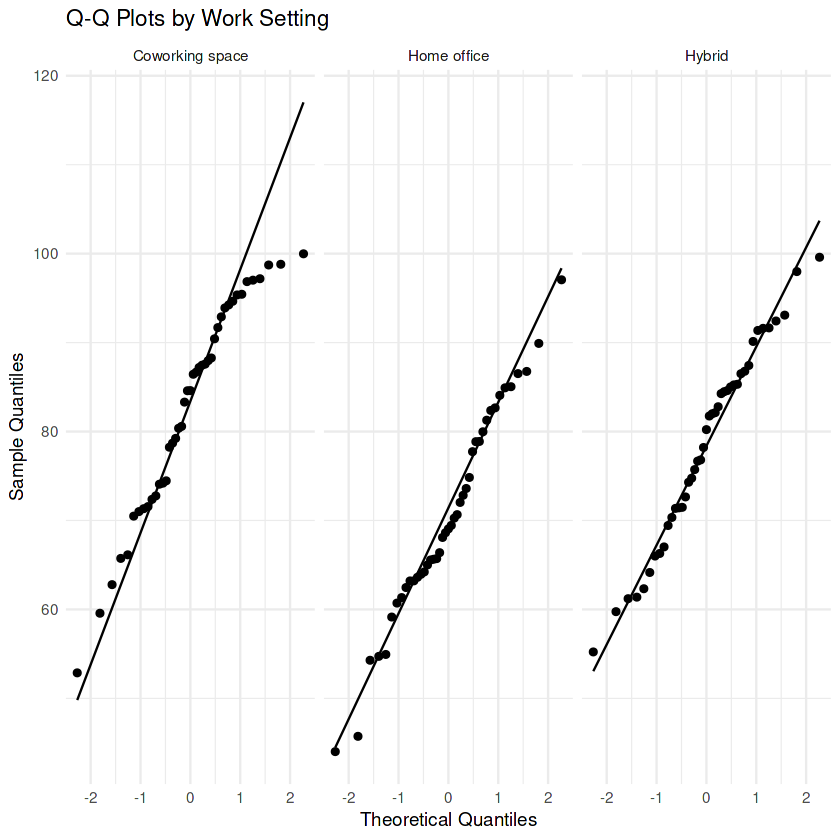

In [12]:
# Your answer here.
library(ggplot2)

library(e1071) 
library(tidyr)
ggplot(data, aes(sample = ProductivityScore)) +
  stat_qq() +
  stat_qq_line() +
  facet_wrap(~RemoteWorkSetting) +
  ggtitle("Q-Q Plots by Work Setting") +
  xlab("Theoretical Quantiles") +
  ylab("Sample Quantiles") +
  theme_minimal()
skewness_by_group <- data %>%
  group_by(RemoteWorkSetting) %>%
  summarise(Skewness = skewness(ProductivityScore, na.rm = TRUE))

print(skewness_by_group)


*Problem 2*

One wants to determine if the work setting has any effect on productivity. How can this be inferred using statistical methods? Name the method and mathematically arrive at this inference. Can one use t-test for the same? Why/ Why not? *(NOTE: Assume the significance level to be 0.05)* (2 + 1 points)


To determine if the work setting has an effect on productivity, the appropriate statistical method is Analysis of Variance (ANOVA).
consider Null Hypothesis (H₀): There is no difference in productivity scores across different work settings. Mathematically, this can be stated as:
H=mean1=mean2=mean3
Perform ANOVA Test:
Calculate the F-statistic:f=Between-Group Variability/Within-Group Variability
Degrees of Freedom:Between-Groups Degrees of Freedom:k_1
                   Within-Groups Degrees of Freedom N-k
 Calculate the Mean Squares
                                                
Mean Square Between= Sum of Squares Between/Degrees of Freedom Between
Mean Square Within= Sum of Squares Within/Degrees of Freedom Within
Calculate the F-statistic:F= Mean Square Between/Mean Square Within
Compare the F-statistic to the critical value from the F-distribution table at the desired significance level (e.g., α=0.05) to determine whether to reject the null hypothesis
​b) t-Test Is Not Suitable because
A t-test is typically used for comparing the means between two groups. If there are more than two groups (e.g., Coworking Space, Home Office, Hybrid), a t-test would not be appropriate as it only compares two means at a time.
 

​

​
               

​
 


## Post-hoc tests.
- When you use ANOVA to test the equality of at least three group means, statistically significant results may indicate that not all of the group means are equal. However, ANOVA results do not identify which particular differences between pairs of means are significant. 
- In such a case, we use post-hoc tests, also known as multiple comparisons.
- There are a variety of post hoc tests you can choose from, but `Tukey’s method` is the most common for comparing all possible group pairings.
- If the adjusted p-value between a pair of groups is less than 0.05, then we can assume statistical significance between the pair.
- You can learn more [here](https://statisticsbyjim.com/anova/post-hoc-tests-anova/).

*Problem 3*

Perform Tukey's Test to infer which pairs have means statistically significant from one other and which dont. (State your answer for significance level at 0.05 and 0.02). Which pair of categories show a *clear* difference in productivity?  (1 + 1 points)

In [14]:
library(ggplot2)
anova_result <- aov(ProductivityScore ~ RemoteWorkSetting, data = data)
summary(anova_result)
tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

                   Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting   2   3344  1672.1    12.5 1.12e-05 ***
Residuals         126  16856   133.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ProductivityScore ~ RemoteWorkSetting, data = data)

$RemoteWorkSetting
                                  diff        lwr       upr     p adj
Home office-Coworking space -12.288336 -18.204391 -6.372280 0.0000077
Hybrid-Coworking space       -4.298428 -10.214484  1.617627 0.2005429
Hybrid-Home office            7.989907   2.073852 13.905963 0.0048685



At a significance level of 0.05 and 0.02, the pair Home office-Coworking space vs. Hybrid-Home office shows a clear difference in productivity.

The Home office-Coworking space group has significantly lower productivity than the Hybrid-Home office group.

The remaining pairs are not statistically significantly different.

# Two-way ANOVA

- Two-way ANOVA is used when the response variable is influenced by several factors.
- Consider the `productivity_twa.csv`, where in now the productivity of the employees is influenced by both, the `work setting` and the `communication tool`. 
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.

*Problem 4*

Does the interaction between different work settings and communication tools significantly affect employee productivity scores? Justify your answer. (2 points)

In [15]:
# your answer here
data <- read.csv("/kaggle/input/anova-file/productivity_data_twa.csv", header=TRUE)
head(data)

,employee_no,RemoteWorkSetting,CommunicationTool,ProductivityScore
,<int>,<chr>,<chr>,<dbl>
1,1,Hybrid,Zoom,93.08691
2,2,Coworking space,Zoom,98.87113
3,3,Hybrid,Email,81.42055
4,4,Hybrid,Slack,80.34142
5,5,Home office,Email,64.21400
6,6,Hybrid,Slack,59.74954


In [16]:
library(ggplot2)
anova_result <- aov(ProductivityScore ~ RemoteWorkSetting * CommunicationTool, data = data)
summary(anova_result)

                                     Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting                     2   3253  1626.5  13.271 6.27e-06 ***
CommunicationTool                     2    673   336.5   2.746   0.0683 .  
RemoteWorkSetting:CommunicationTool   4    854   213.4   1.742   0.1454    
Residuals                           119  14584   122.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

the work setting has a significant effect on the productivity scores. The p-value for the interaction effect between remote work setting and communication tools is not provided, so we can not determine whether the interaction between different work settings and communication tools significantly affect employee productivity scores.

*Problem 5*

Having learnt from the above study, which pair of work setting and communication tool must be adopted by the management for the employees? Based on the study, would you, as an entrepreneur adopt the same strategy for your company? Justify your answer. What would the name of your company be? 👀 (1 point)


In [17]:
# your answer here.
library(ggplot2)
avg_productivity_by_setting <- data %>%
  group_by(RemoteWorkSetting) %>%
  summarise(AvgProductivity = mean(ProductivityScore, na.rm = TRUE))
print(avg_productivity_by_setting)
best_work_setting <- avg_productivity_by_setting %>% 
  arrange(desc(AvgProductivity)) %>% 
  slice(1) %>% 
  pull(RemoteWorkSetting)

avg_productivity_by_tool <- data %>%
  filter(RemoteWorkSetting == best_work_setting) %>%
  group_by(CommunicationTool) %>%
  summarise(AvgProductivity = mean(ProductivityScore, na.rm = TRUE))
print(avg_productivity_by_tool)

# A tibble: 3 × 2
  RemoteWorkSetting AvgProductivity
  <chr>                       <dbl>
1 Coworking space              82.8
2 Home office                  70.6
3 Hybrid                       77.2
# A tibble: 3 × 2
  CommunicationTool AvgProductivity
  <chr>                       <dbl>
1 Email                        87.3
2 Slack                        83.3
3 Zoom                         77.4


The data shows that the highest average productivity is achieved when using Email for communication and working in a Coworking space.

As an entrepreneur, I would not necessarily adopt the same strategy for my company. While the data suggests a correlation, it's important to consider other factors:
Company Culture: My company's culture might value collaboration, making a coworking space less suitable than a traditional office.
Employee Preferences: Some employees may prefer remote work, while others might thrive in a collaborative environment.
Nature of Work: The type of work my company does may require different communication tools. For example, a creative agency might need face-to-face meetings more than an online marketing company.

*fin*